../input/results/oxdna_random_6/L1/d-2-14/L1_d-2-14_2023-01-30-194808/L1_d-2-14_2023-01-30-194808/  
{'ratio_of_volume': 1.0, 'mean_volume': 6.4863029958777645, 'deviation_of_volume': 5.766281297335398}  
../input/results/oxdna_random_6/L1/d-7-15/L1_d-7-15_2023-01-30-063234/L1_d-7-15_2023-01-30-063234/  
{'ratio_of_volume': 0.95, 'mean_volume': 210.06664569316092, 'deviation_of_volume': 5.820491074083896}  

I would like to check this results  

In [13]:
pwd

'/Users/hyakuzukamaya/Desktop/lab/judgement_system/script'

In [14]:
import sys
sys.path.append('../')
sys.path.append('.')
sys.path.append('measuring_volume/')
sys.path.append('common/')
import measuring_volume.convexhull_volume as cv
import measuring_volume.get_top_data as gtd

In [15]:
# target_dir2 = "../input/results/oxdna_random_6/L1/d-7-15/L1_d-7-15_2023-01-30-063234/L1_d-7-15_2023-01-30-063234"
# cv.convexhull_volume_all_strands(target_dir2)
# cv.convexhull_volume_all_strands_meandev(target_dir2)
# strands2particle, particle2strand = gtd.get_particle_strands_data(target_dir2)
# print(float(len(strands2particle)))

In [16]:
# target_dir3 = "../input/results/oxdna_random_6/L1/d-3-6-11-12-13/L1_d-3-6-11-12-13_2023-01-27-133719/L1_d-3-6-11-12-13_2023-01-27-133719/"

In [134]:
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append('../')
sys.path.append('.')
sys.path.append('measuring_volume/')
sys.path.append('common/')
import common.get_target_file as gtf
from mpl_toolkits.mplot3d import Axes3D
# import get_top_data as gtd
# import get_conf_data as gcd
from scipy.spatial import ConvexHull
# import k3d
import statistics
import math

def get_all_r(target_dir):
    conf_name = gtf.get_conf(target_dir)
    conf_f = open(conf_name, "r")
    col = 0


    x = []
    y = []
    z = []
    for l in conf_f:
        col += 1
        if col > 3:
            rx = float(l.split(" ")[0])
            ry = float(l.split(" ")[1])
            rz = float(l.split(" ")[2])
            x.append(rx)
            y.append(ry)
            z.append(rz)

    conf_f.close()
    return x, y, z


def get_r(particle2r, strands):

    target_strands = list(strands)

    x = []
    y = []
    z = []

    for particle_id in target_strands:
        x.append(particle2r[particle_id][0])
        y.append(particle2r[particle_id][1])
        z.append(particle2r[particle_id][2])
    
    return x, y, z

def plot_points(points):
    points = np.array(points)
    
    hull = ConvexHull(points)



    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Plot defining corner points
    ax.plot(points.T[0], points.T[1], points.T[2], "ko")
    # ax.plot(x, y, z, "ko")

    # 12 = 2 * 6 faces are the simplices (2 simplices per square face)
    for s in hull.simplices:
        s = np.append(s, s[0])  # Here we cycle back to the first coordinate
        ax.plot(points[s, 0], points[s, 1], points[s, 2], "r-")



def convexhull_volume(x, y, z):
    points = []
    for i in range(len(x)):
        lst = [x[i], y[i], z[i]]
        points.append(lst)
        
    hull = ConvexHull(points)

    # print(points)
    plot_points(points)

# plot

    # points = np.array(points)
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection="3d")

    # # Plot defining corner points
    # ax.plot(points.T[0], points.T[1], points.T[2], "ko")
    # # ax.plot(x, y, z, "ko")

    # # 12 = 2 * 6 faces are the simplices (2 simplices per square face)
    # for s in hull.simplices:
    #     s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    #     ax.plot(points[s, 0], points[s, 1], points[s, 2], "r-")
    #     # ax.plot(x, y, z, "r-")

    # # Make axis label
    # for i in ["x", "y", "z"]:
    #     eval("ax.set_{:s}label('{:s}')".format(i, i))

    # plt.show()

    
    return hull.volume
    
def plot(X, Y, Z, target_dir):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X, Y, Z)
    plt.show()

    
def translate_strand(points, box=100):
    # type of points is [[cm_pos_x, cm_pos_y, cm_pos_z]]
    # 2.translate(np.rint((s1.cm_pos - s2.cm_pos - diff1 + diff2) / self._box) * self._box)
    # diff1 = np.rint(s1.cm_pos / self._box ) * self._box

    new_points = []

    for index, p in enumerate(points):
        if index == 0:
            plst = np.array(p)
            print(plst)
            first_diff = np.rint(plst/box) * box
            first_p = plst
            p -= first_diff
            new_points.append(p)
        else:
            plst = np.array(p)
            tmp_diff = np.rint(plst/box) * box
#             p += first_diff - tmp_diff
            print(first_diff,tmp_diff)
            p -= tmp_diff
            new_points.append(p)
    
#     new_points = np.mod(new_points, box)
    
    return new_points

def strand_cm_pos(strand2r):

    strand2cm_pos = {}

    for s in strand2r:
        x = 0.0
        y = 0.0
        z = 0.0
        for r in strand2r[s]:
            x += r[0]
            y += r[1]
            z += r[2]
        x /= float(len(strand2r))
        y /= float(len(strand2r))
        z /= float(len(strand2r))

        strand2cm_pos[s] = [x, y, z]

    return strand2cm_pos
    
def get_strand_r(strands2particle, particle2strand, target_dir):
    print("strands2particle ", strands2particle)
    print("particle2strand ", particle2strand)

    volumes = {}
    particle2r = {}
    strand2r = {}
    p = 0

    x, y, z = get_all_r(target_dir)
    for (xi, yi, zi) in zip(x, y, z):
        particle2r[p] = [xi, yi, zi]
        p += 1
        
    print("particle2r ", particle2r)

    for p in particle2strand:
        s = particle2strand[p]
        if not s in strand2r:
            strand2r[s] = [particle2r[p]]
        else:
            strand2r[s].append(particle2r[p])
    
    print("strand2r", strand2r)

    return particle2r, strand2r

# def connected_strand_translate():
    
def move_strand(move_vec, strand_r,  BOX_SIZE=100):
    # move_vec [move_x, move_y, move_z]
    # strand_r [[x1, y1, z1], [x2, y2, z2], [x3, y3, z3] ... ]

    new_strand_r = []
    pre_p = strand_r[0]
    for p in strand_r:
        p[0] -= move_vec[0]
        p[1] -= move_vec[1]
        p[2] -= move_vec[2]
        distance = math.sqrt((pre_p[0] - p[0])**2 + (pre_p[1] - p[1])**2 + (pre_p[2] - p[2])**2)
        pre_p = p
        
        if distance > BOX_SIZE/2:
            print(pre_p, p, end="")
            print(distance)
            # move_vecを更新
            print("pre move vec : ", move_vec, " pre p :", pre_p)
            print("", " p :", p)
        # pre_p = p

        new_strand_r.append([p[0], p[1], p[2]])

    return new_strand_r



def convexhull_volume_all_strands_meandev(target_dir):
    strands2particle, particle2strand = gtd.make_initial_strands_data(target_dir)
    particle2r, strand2r = get_strand_r(strands2particle, particle2strand, target_dir)
    # get each center position of strand
    strand2cm_pos = strand_cm_pos(strand2r)

    print("strand2cm_pos", strand2cm_pos)
    strands2particle, particle2strand = gtd.get_particle_strands_data(target_dir)
    print(len(strands2particle))
    connected_strands = gtd.get_connected_strands_data(target_dir)

    print("get_connected_strands_data", connected_strands)
    moved_strand = set()
    # change r
    for strand in strand2cm_pos:
        
        # move strand
        if not strand in moved_strand:
            # strand has connected strands, add the strands too.
            cm_pos = strand2cm_pos[strand]
            r = strand2r[strand]
            moved_strand.add(strand)
            strand2r[strand] = move_strand(cm_pos, r)
            if strand in connected_strands:
                for connected_strand in connected_strands[strand]:
                    cm_pos = strand2cm_pos[connected_strand]
                    r += strand2r[connected_strand]
                    moved_strand.add(connected_strand)
            
            print(len(cm_pos), len(r))
            strand2r[strand] = move_strand(cm_pos, r)
            # strand2r[strand] = move_strand(strand2cm_pos[strand], strand2r[strand])
            moved_strand.add(strand) 
    
    volumes = {}

    print(len(strands2particle))

    for strand in strands2particle:
        x, y, z = get_r(particle2r, strands2particle[strand])
        volumes[strand] = convexhull_volume(x, y, z)
        #         print(x, y, z)
        # plot(x, y, z, target_dir)
        # plot_points(volumes[strand])
    
    print(volumes)
    
    mean_volume = 0.0
    num_of_strands = float(len(strands2particle))

    for strand in volumes:
        mean_volume += volumes[strand]
    
    mean_volume /= num_of_strands
    dev_volume = statistics.pstdev(volumes)
    # print(num_of_strands)

    return mean_volume, dev_volume


In [135]:
# convexhull_volume_all_strands_meandev(target_dir2)

In [136]:
# convexhull_volume_all_strands_meandev(target_dir3)

strands2particle  {1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, 2: {20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}, 3: {40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, 4: {60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, 5: {80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, 6: {100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119}, 7: {128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 120, 121, 122, 123, 124, 125, 126, 127}, 8: {140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159}, 9: {160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179}, 10: {180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}, 11: {200, 201, 202, 203, 204, 205, 206, 

/var/folders/t5/9_w43txj551cpbyq7d7b78000000gn/T/ipykernel_11819/4109975635.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


{1: 5.126053472807905, 2: 10.701496356332996, 3: 9.698667763833303, 4: 10.332145913483014, 5: 7.1623069097041645, 6: 10.05285672570515, 7: 8.899308748264914, 8: 1620.1680758377106, 9: 8.097817897581484, 10: 10.97155739583743, 11: 5.873692412109286, 12: 8.539779892582514, 13: 6.47826060648696, 14: 8.768522585503355, 15: 8.788342445253422, 16: 10.598801465606927, 17: 13.910295933903505, 18: 10.999196980325554, 19: 9.07616179369188, 20: 8.769064613474427, 21: 7.7554878757613235, 22: 14.646812587369324, 23: 4.585322312643737, 24: 8.047808859974685, 25: 11.31444212778649, 26: 7.73234012895199, 27: 6.494611253367019, 28: 12.72664406477223, 29: 11.629976532868808, 31: 8.693484576036946, 32: 10.912677494932936, 33: 7.802450040305487, 34: 7.963033496026638, 35: 6.070778619635426, 36: 8.74975547970678, 37: 9.034197411737443, 38: 9.405755650070631, 39: 6.3422724721673385, 40: 3.3046253425980203, 41: 7.602562397613033, 42: 11.63898044234843, 43: 4.629605070731215, 44: 8.818957201510601, 45: 8.4097

(36.02630507919679, 17.46412582677477)

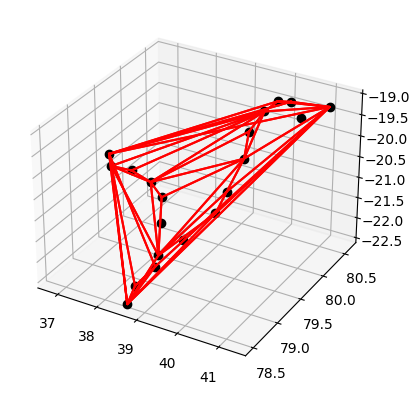

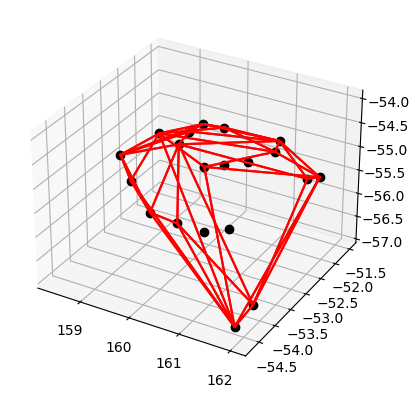

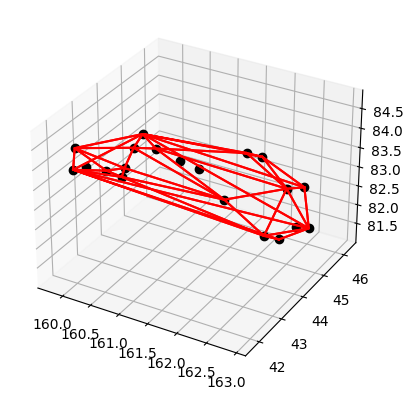

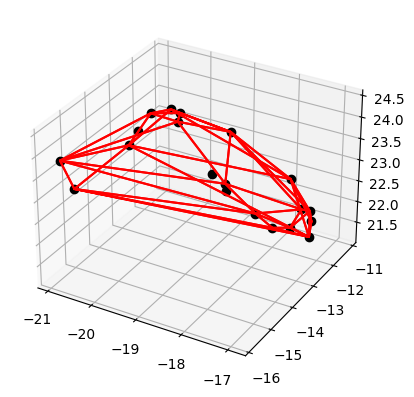

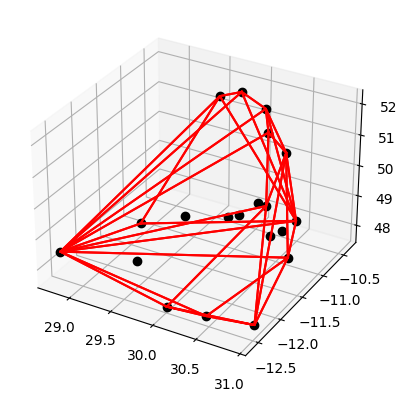

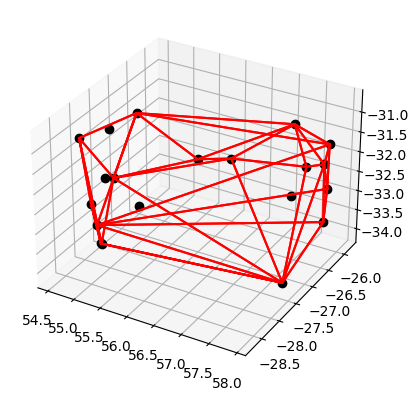

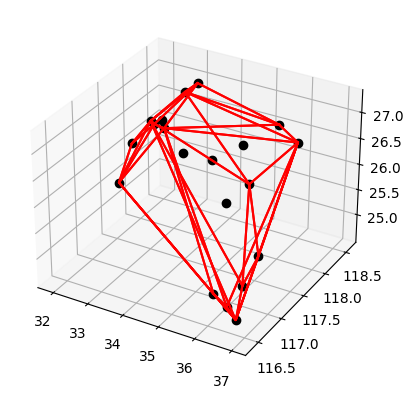

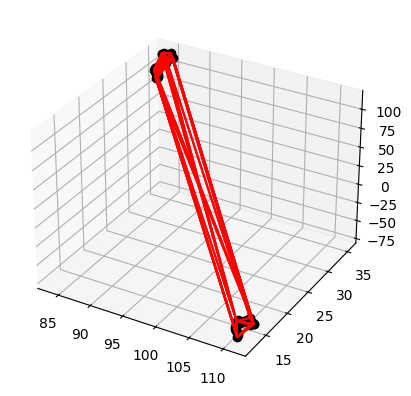

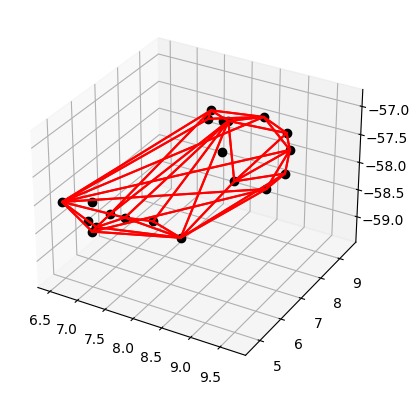

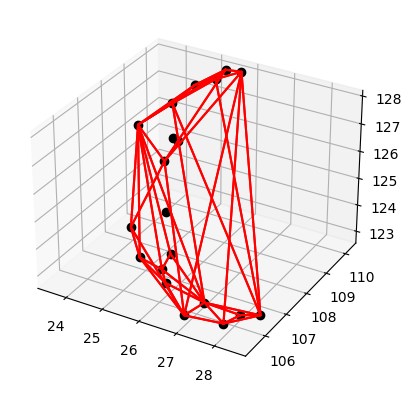

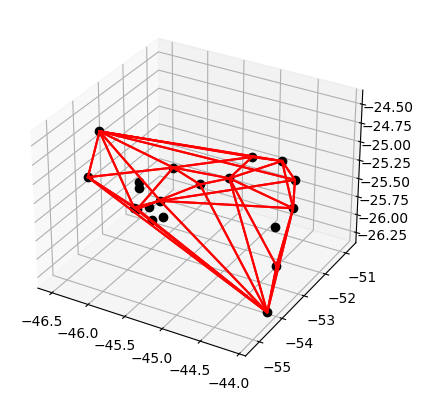

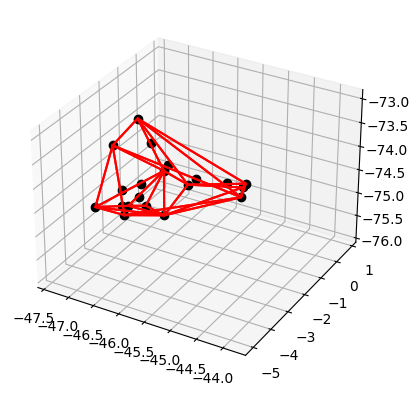

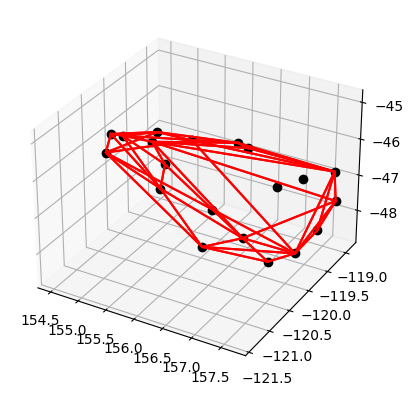

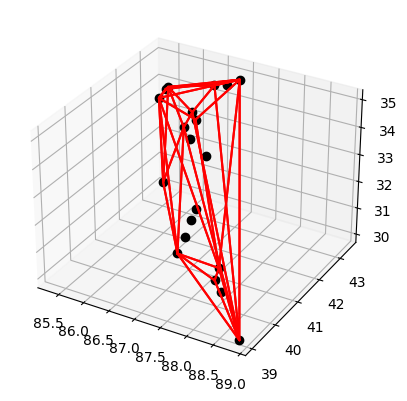

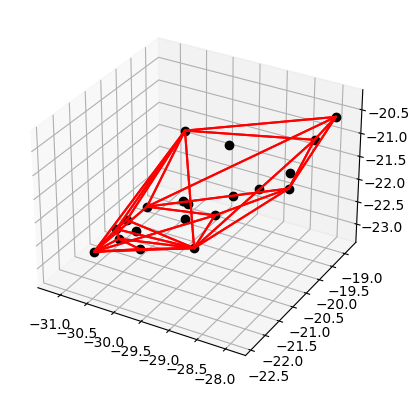

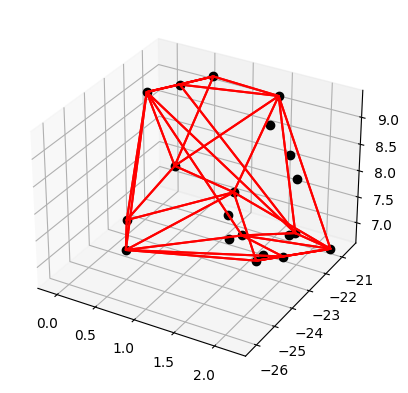

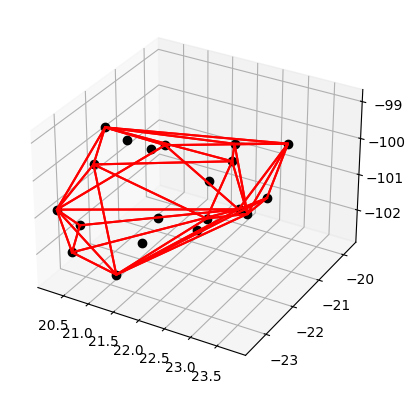

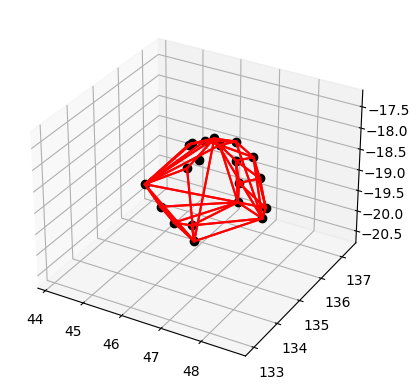

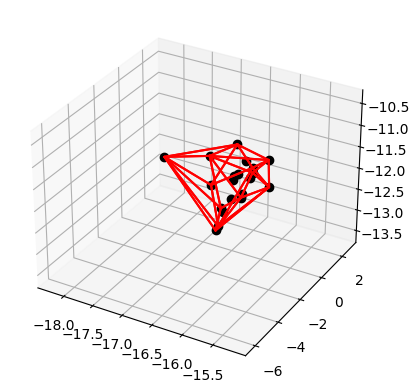

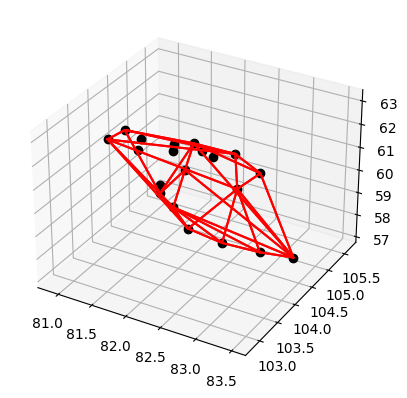

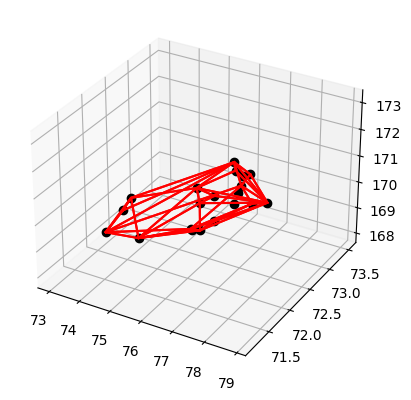

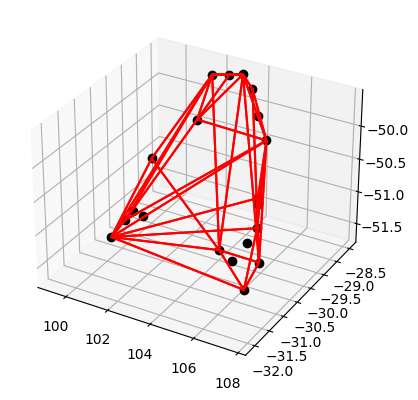

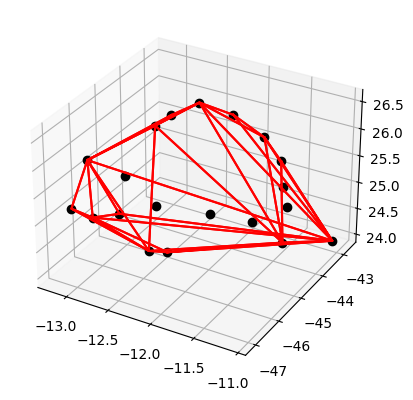

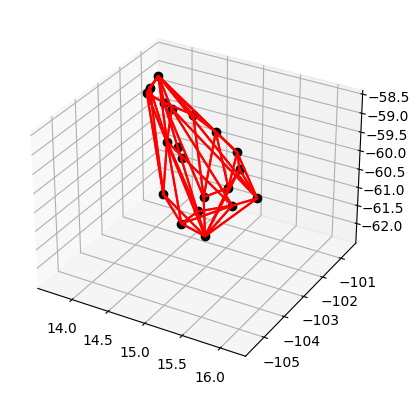

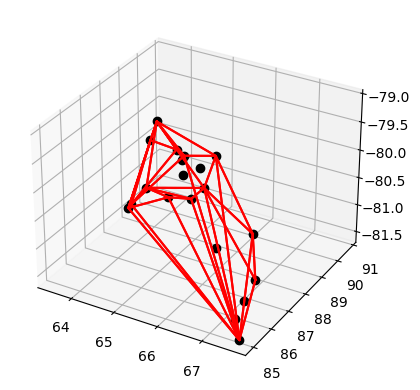

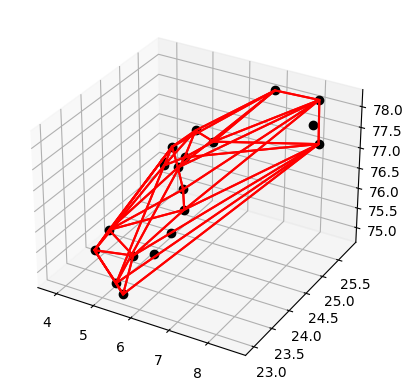

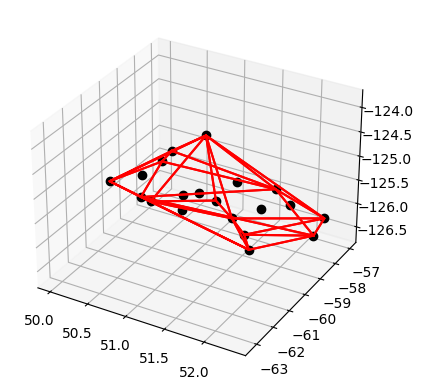

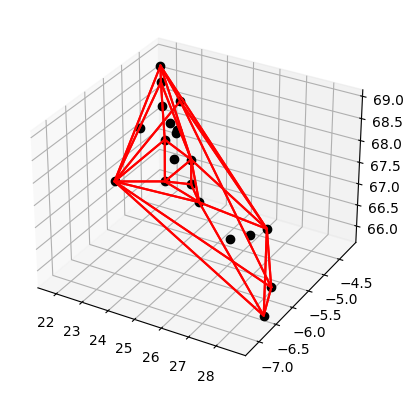

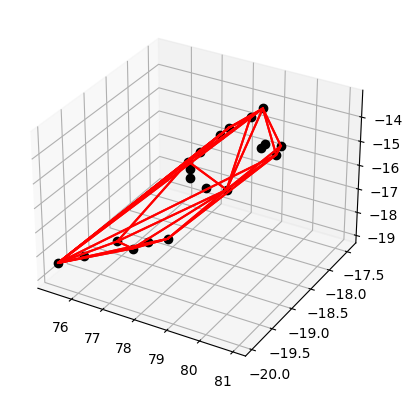

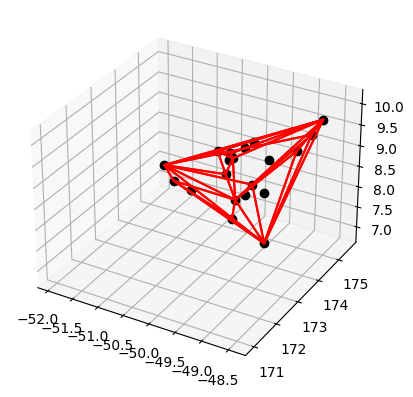

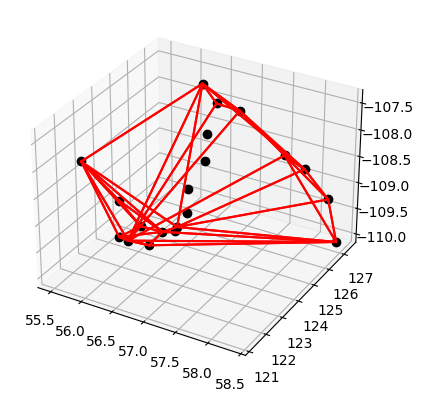

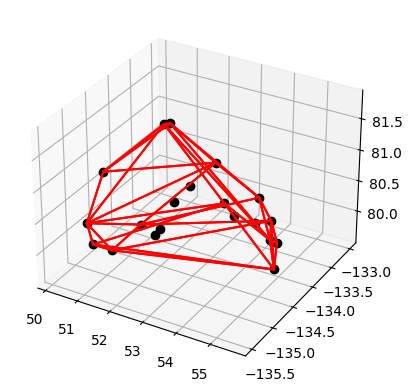

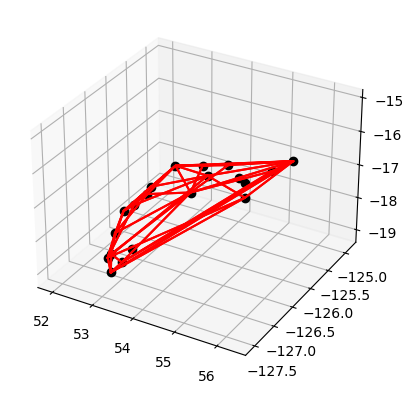

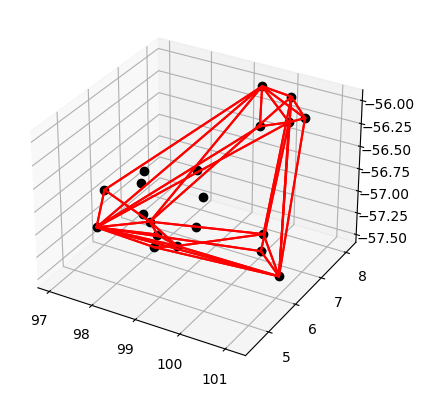

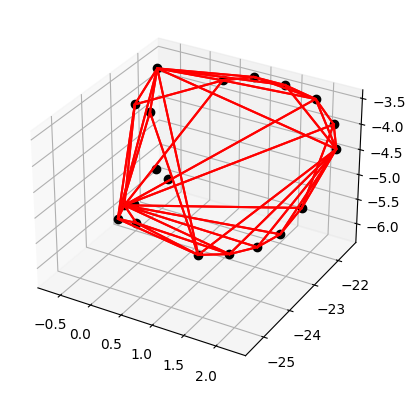

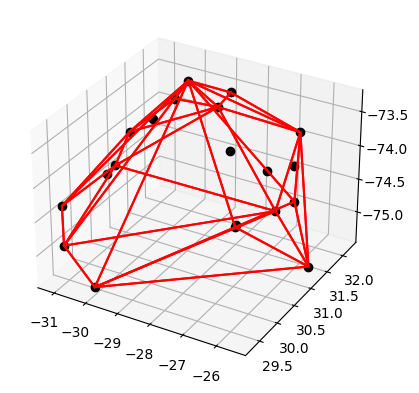

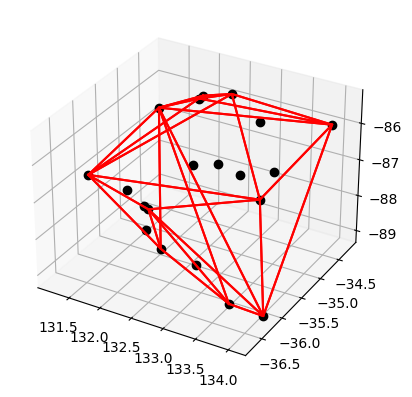

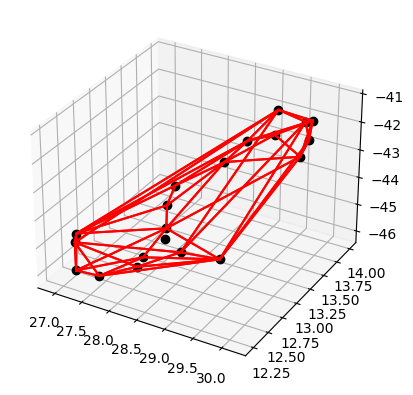

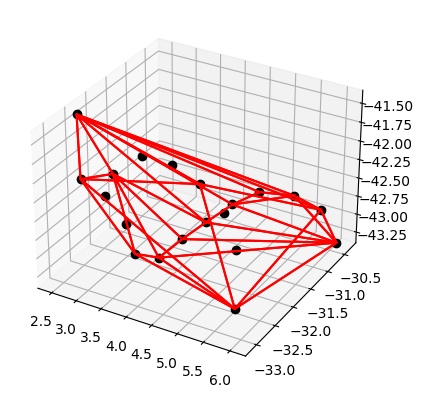

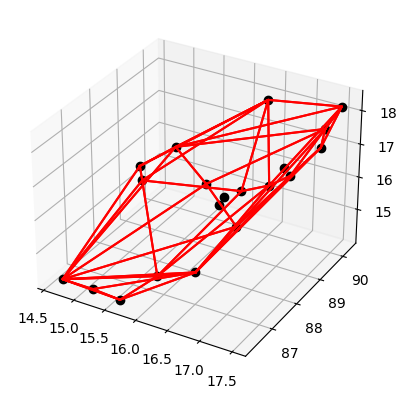

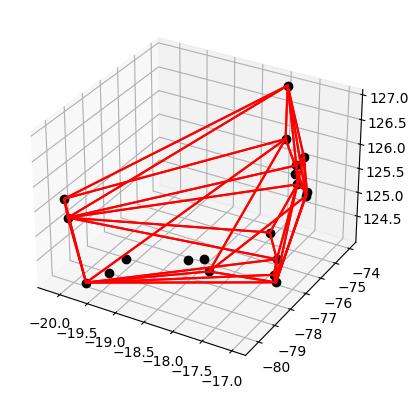

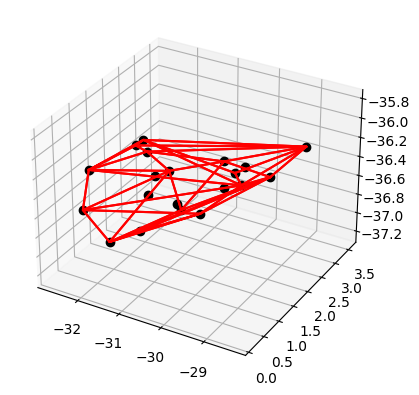

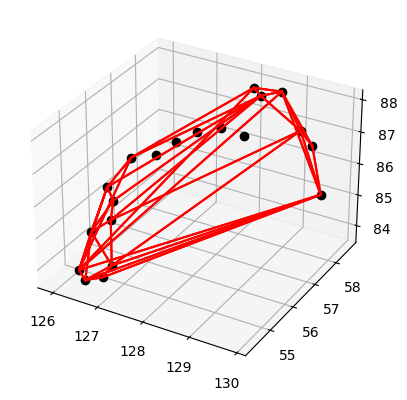

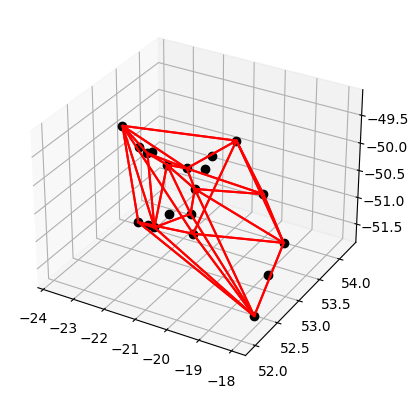

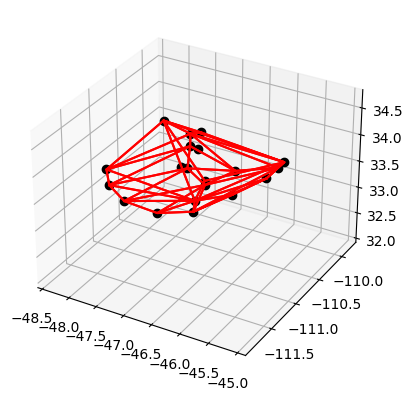

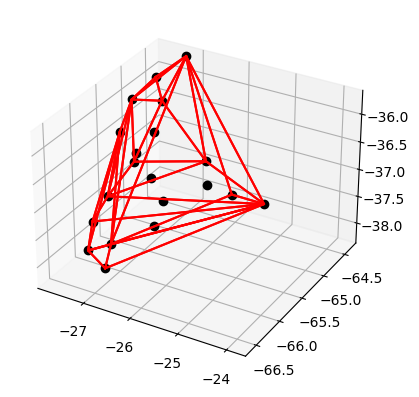

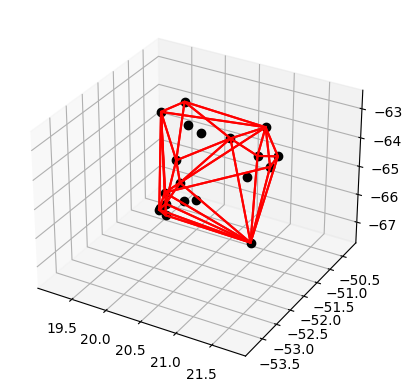

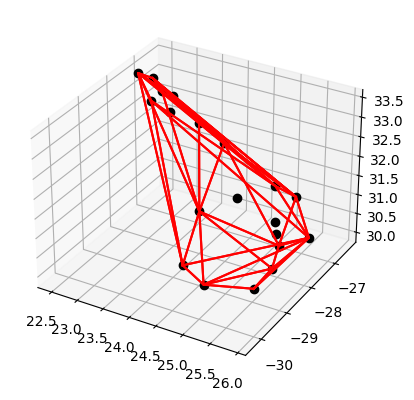

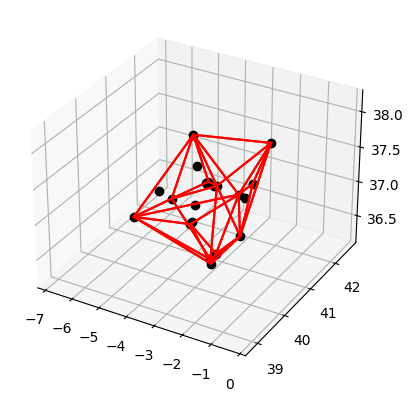

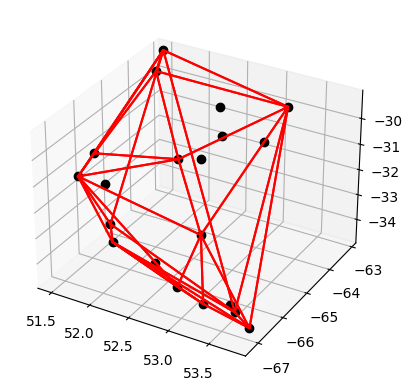

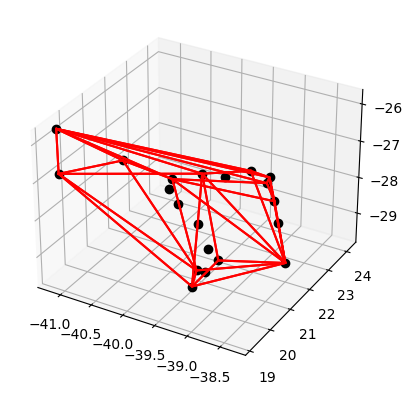

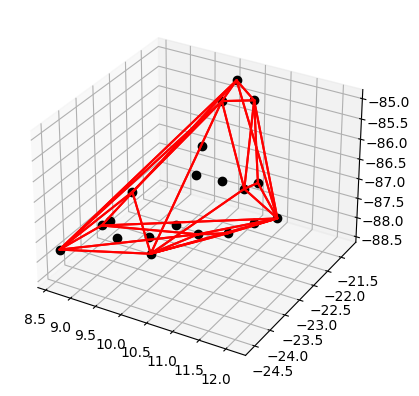

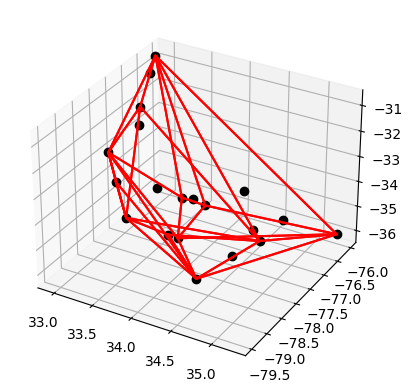

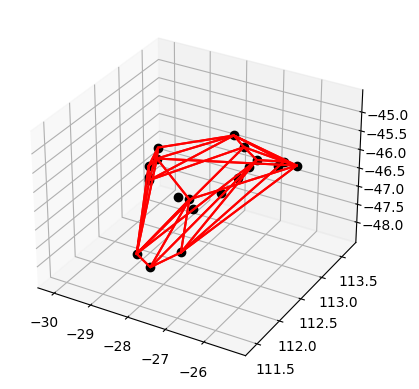

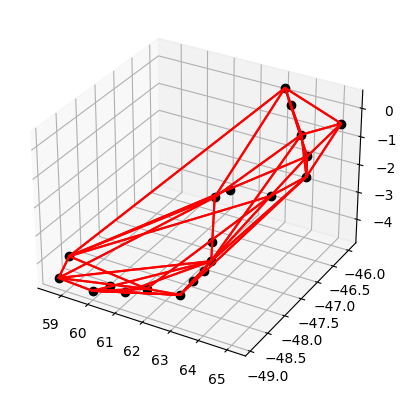

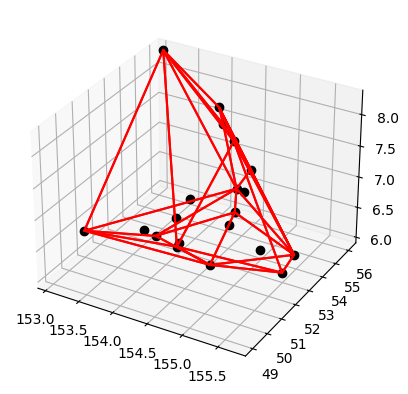

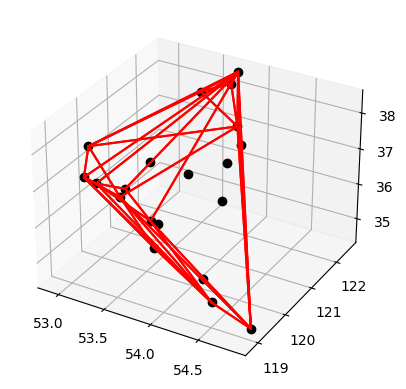

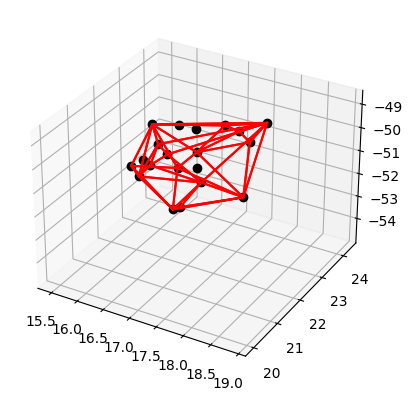

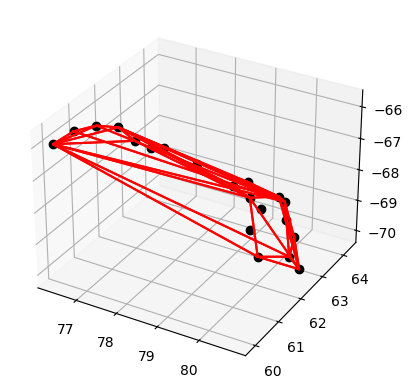

In [137]:
# this directory has bonded strand
tmp_target = "../input/results/oxdna_random_6_diffseq_2/L1/d-1-4-7-10-14-15/L1_d-1-4-7-10-14-15_2023-02-01-020045/L1_d-1-4-7-10-14-15_2023-02-01-020045/"
convexhull_volume_all_strands_meandev(tmp_target)

In [129]:
lst = [[96.6518314888424, -227.392072286216, 219.803277275761],
 [96.5452072329311, -227.190120531322, 220.24401646738],
 [96.8502487237835, -226.135694873475, 219.755073482845],
 [97.2485868444429, -226.147834659714, 219.424198893554],
 [97.329554600845, -225.853807714041, 218.991817076538],
 [97.7254510103363, -225.514993502087, 218.737878709592],
 [98.0387206841756, -225.110212797437, 218.767988172248],
 [98.4988166730302, -224.95130673137, 218.892231064315],
 [99.0468681108471, -224.851025756903, 218.895433328301],
 [99.6603193990761, -224.961411671824, 218.881514324423],
 [100.142956678409, -225.081177100267, 218.636170273363],
 [100.517575856033, -225.051403140247, 218.152239399471],
 [100.606870364209, -224.992508337628, 217.652953615376],
 [101.252718485089, -225.691310714448, 217.463493543791],
 [101.585519804945, -225.533005823739, 217.651442825199],
 [101.846358484485, -225.213175813547, 217.816470964865],
 [101.930490128441, -224.740750351131, 217.94069230943],
 [102.139422792698, -224.620638895751, 218.381344942305],
 [102.368259748101, -224.755885095941, 218.849774895617],
 [102.324052147393, -223.939748652477, 219.53022559266],
 [199.489127807409, 177.220808914266, 316.383838769977],
 [198.777119094293, 176.242769436341, 316.923143971852],
 [198.995259372871, 176.26198951281, 317.370476337845],
 [199.502056703995, 176.972160656934, 317.864336867841],
 [199.878433058766, 176.356885453373, 317.245736012956],
 [199.65160661812, 175.898520831043, 318.060671787543],
 [199.430723526655, 175.525841974302, 317.918502347712],
 [199.273338697072, 175.049998742355, 317.802915156943],
 [199.155997725213, 174.471739515377, 317.989162539842],
 [198.991330351767, 174.086298963222, 318.340303285739],
 [198.771725982412, 173.928405694356, 318.79420194709],
 [198.594270764397, 173.980029526168, 319.30075588847],
 [198.328653971525, 174.209619595546, 319.644163950024],
 [198.04110251874, 174.624712490993, 319.733820416899],
 [197.57951651398, 174.859503274299, 319.928263640322],
 [197.060257648537, 174.948437588954, 319.840396646307],
 [196.642961450098, 174.799607949156, 320.042225894988],
 [196.351150974153, 174.486514451996, 320.266276369638],
 [196.249676880215, 174.261128995387, 320.679837359277],
 [196.255869548483, 174.596328359795, 321.207938340279]]

In [3]:
np.mod(lst, 100)

NameError: name 'np' is not defined

In [4]:
list(translate_strand(lst, box=100))

NameError: name 'translate_strand' is not defined

In [ ]:
lst

In [ ]:
lst3 = [[113.588197583388, 203.888938874685, 469.265374511251], [114.686861493086, 203.678305582217, 469.522151491238], [114.658799188854, 202.796094615502, 469.022183323913], [115.045916314244, 202.59532369231, 469.373615297389], [115.29350661411, 202.316133156593, 469.59935250739], [115.711734589676, 202.182921667577, 469.689210976614], [116.506037248817, 201.760550134854, 470.325338031368], [116.629946977713, 201.492806103276, 470.795588928152], [116.932175758274, 200.655728426125, 471.261728307679], [116.923483160728, 200.174673368976, 471.431282301583], [116.943393973629, 200.016338895685, 471.958214234288], [117.022455834832, 200.100607937475, 472.460442933292], [117.718046574, 199.444145076543, 472.960643450407], [117.801201825547, 199.257549921587, 473.621975073333], [117.2057351004, 199.380712064569, 474.607446978405], [118.359658667771, 199.514458606798, 474.805061648047], [118.746365695357, 199.732447069023, 475.112631281826], [119.080623353478, 199.898279806724, 475.454232973735], [119.497279401705, 199.801340329111, 475.638443122191], [119.916324668483, 199.659635557707, 475.543945831703]]

In [ ]:
print(np.mod(lst3, 100))

In [ ]:
print(np.array(lst3))